#                         NBA Player Analytics EDA

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("C:/Users/Lukas Buteliauskas/Desktop/Springboard Projects/Capstone Project 1 - NBA Analytics/2. Data Wrangling/Player Data Clean.csv", "r") as player_data_file:
    player_data_df=pd.read_csv(player_data_file)

player_data_df=player_data_df.iloc[:,1:] # Getting rid of read in index column.

# Setting variable types
for column in ["Country or State", "Tm", "US or EU"]: 
    player_data_df[column]=player_data_df[column].astype("category")

player_data_df["Year in League"]=player_data_df["Year in League"].astype("int")
player_data_df["Season"]=player_data_df["Season"].str.slice(0,4) # Keeping only the year

In this project we aim to find out how groups of NBA centers from the US and EU differ from one another. What are the advantages or disadvantages between groups, and is there even a difference at all? Let's try and answers some of these questions. Let's first see how many players are in each group.

In [2]:
print(player_data_df["US or EU"].value_counts())

US    3804
EU     592
Name: US or EU, dtype: int64


Perhaps not so surprisingly the majority of the players are US based, however I expected the proportion to be even smaller. Let's see how this has evolved throughout the years. To keep things consistent in our graphs we will use Red for US data and Blue for EU data. In the cases where the colors hide certain details we will use lighter or darker shades of Red or Blue respectively.

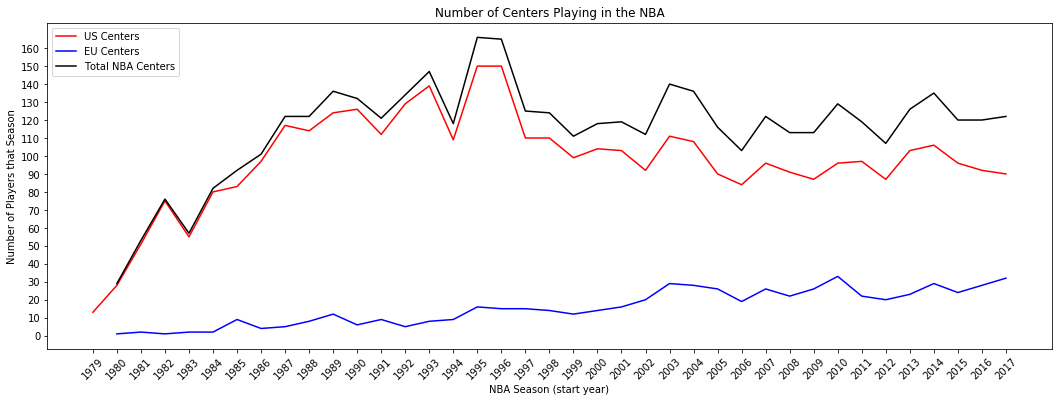

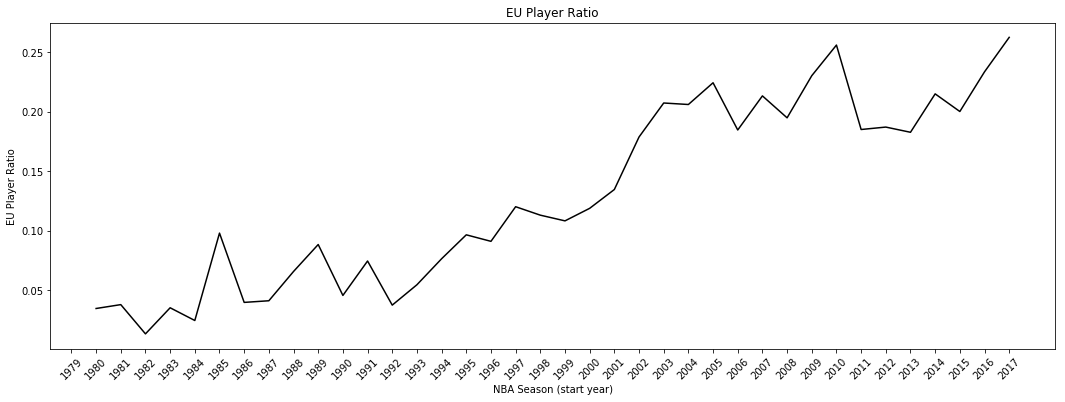

In [3]:
us_player_count=player_data_df[player_data_df["US or EU"]=="US"]["Season"].value_counts().sort_index()
eu_player_count=player_data_df[player_data_df["US or EU"]=="EU"]["Season"].value_counts().sort_index()

plt.rcParams["figure.figsize"] = [18,6]
plt.plot(us_player_count, color="r", label="US Centers")
plt.plot(eu_player_count, color="b", label="EU Centers")
plt.plot(us_player_count+eu_player_count, color="black", label="Total NBA Centers")
plt.legend(loc="upper left")
plt.title("Number of Centers Playing in the NBA")
plt.xlabel("NBA Season (start year)")
plt.ylabel("Number of Players that Season")
plt.xticks(rotation=45)
plt.yticks([x for x in range(0,170,10)])
plt.show()

plt.plot(eu_player_count/(eu_player_count+us_player_count), color="black")
plt.title("EU Player Ratio")
plt.xlabel("NBA Season (start year)")
plt.ylabel("EU Player Ratio")
plt.xticks(rotation=45)
plt.show()

The first plot reinforces this difference in the 2 categories and seems to suggest that the ratio of EU players has been steadily increasing. The second plot verifies this claim and confirms my original hypothesis. This matters, because it means we have a larger sample size of players from the EU in the recent years which will allow us to be more confident in our statistical inferences later on. Before we get to that though, let's get an idea of how our players match up between these 2 categories. It's important to note that the values in the dataframe are 'per Game' statistics (Points per game, assists per game etc) computed as season averages.

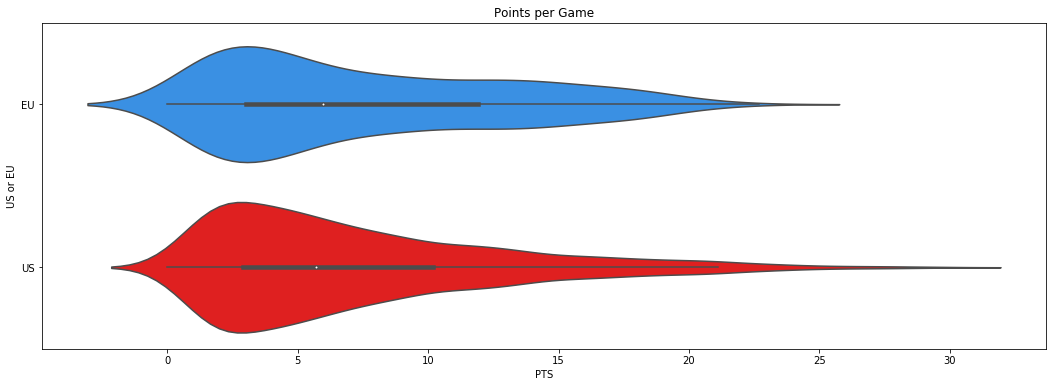

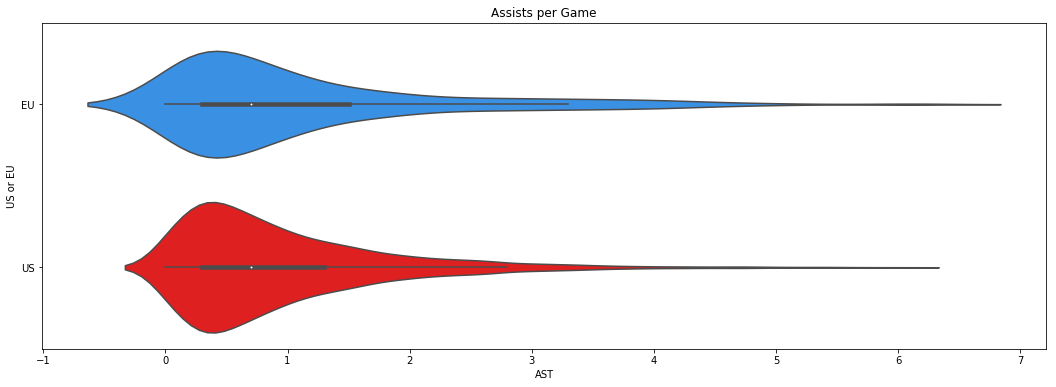

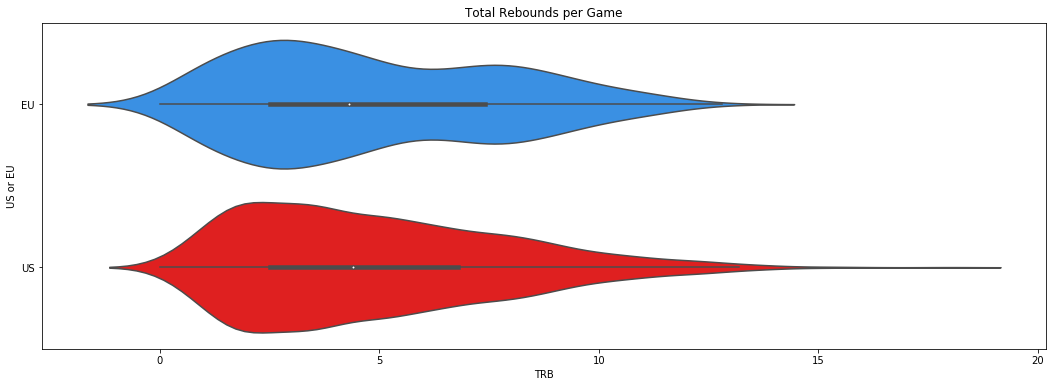

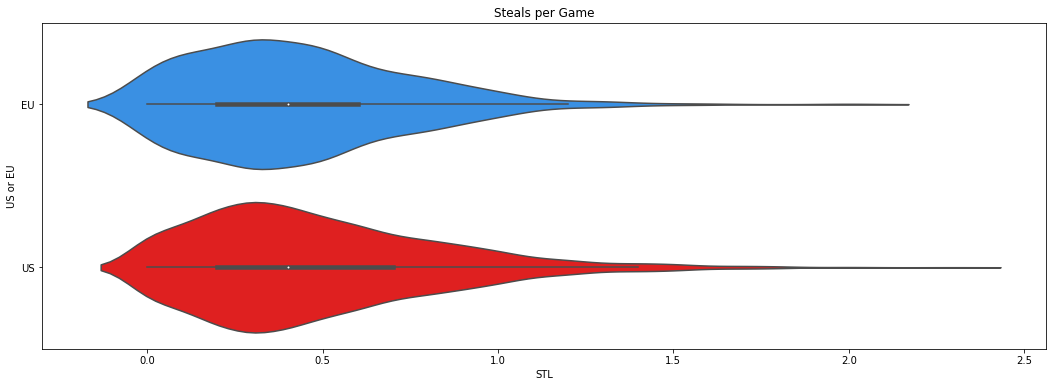

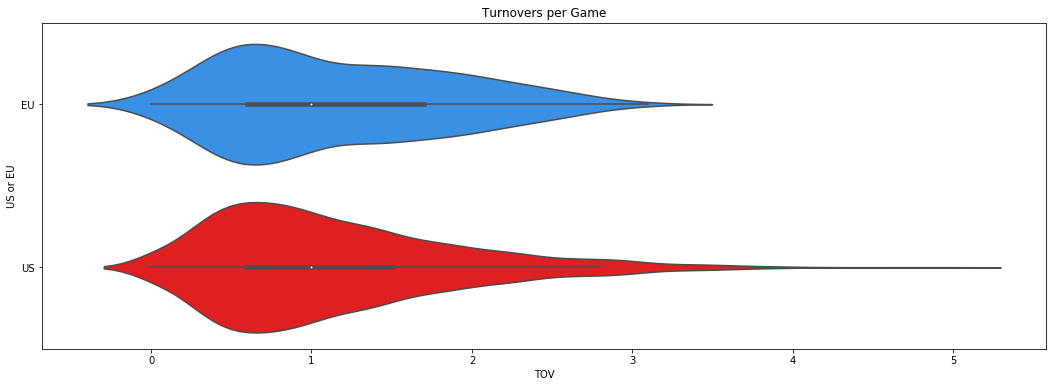

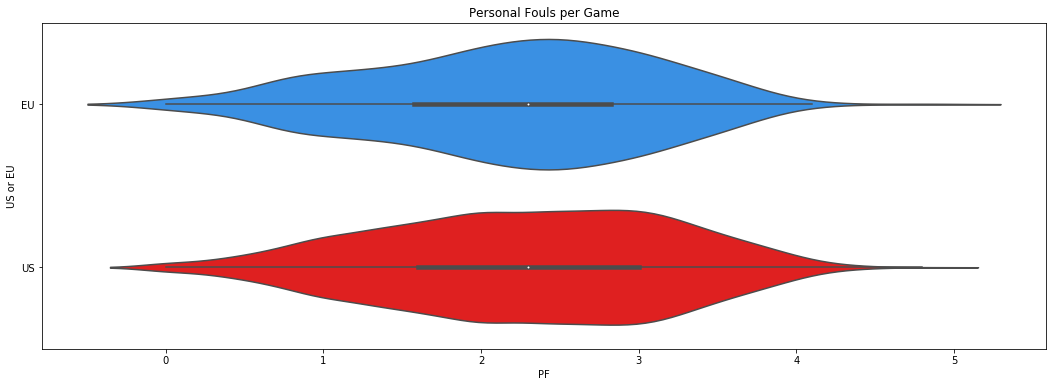

In [4]:
sns.violinplot(y="US or EU", x="PTS", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Points per Game")
plt.show()
sns.violinplot(y="US or EU", x="AST", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Assists per Game")
plt.show()
sns.violinplot(y="US or EU", x="TRB", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Total Rebounds per Game")
plt.show()
sns.violinplot(y="US or EU", x="STL", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Steals per Game")
plt.show()
sns.violinplot(y="US or EU", x="TOV", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Turnovers per Game")
plt.show()
sns.violinplot(y="US or EU", x="PF", data=player_data_df, palette={"US":"r", "EU":"dodgerblue"})
plt.title("Personal Fouls per Game")
plt.show()

Let's cover each violin plot one by one, keeping in mind that given the larger proportion of US players than EU players, outliers are potentially more likely.

With regards to Points per Game (PPG), both groups are very similarly matched with the median and the lower quartile being almost identical. However the EU players have a larger interquartile range, meaning that they are more evenly distributed with regards to how many points they earn. Furthermore the 95% confidence interval (CI) stretches further for the EU players. So while there are a few seasons where US players averaged between 27.5 and 33 PPG, the EU players (proportionally speaking), on average, tend to earn slightly more points per game. The difference is minimal however. Perhaps this is because for EU players to apply to the NBA draft, they have to be that much better than the other EU players to even consider it. This might explain the more flat distribution when compared to the US players, for whom the NBA is the natural choice when going pro and so you get alot more 'average to below average' players who, had they not been born in the US (with all other things being equal) might not have applied for the draft. 

The Assists violin plot showed a similar story. The distributions are almost identical with the upper quartile and the 95% CI higher for the EU centers, but as before, not by much. Again there are a few 'anomalies' in both categories stretching the violin to the right. This is perhaps contracy to the notion that 'European Big Men' are better passers.

The rest of the plots show a similar story with certain outliers pulling the violin one way or another,with the median and interquartile ranges almost indiscernible between groups of players. US centers turn the ball over (turnovers) slightly less than EU centers, however EU centers are slightly better rebounders. Seeing this begs the question if the there is any difference (statistically speaking) between EU and US centers, we will need to compute a hypothesis test later on, let's continue exploring our data for now though. We have not accounted for player age, which in my opinion must be one of the greatest determinants of most of the above statistics (hypothesis that age strongly corrolates with the above statistics). Let's see if this is the case. 

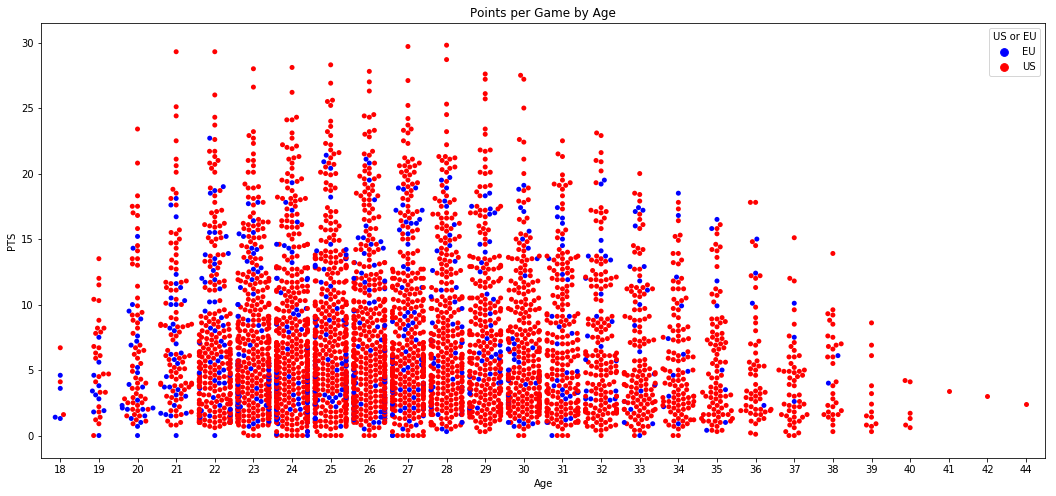

In [5]:
"""sns.lmplot(x="Age", y="PTS", data=player_data_df, hue="US or EU", fit_reg=False, palette={"US":"r", "EU":"b"}, size=12, aspect=1)
plt.title("Points per Game by Age")
plt.xticks([x for x in range (18,45,1)])
plt.show()"""
plt.rcParams["figure.figsize"] = [18,8]
sns.swarmplot(x="Age", y="PTS", data=player_data_df, hue="US or EU", palette={"US":"r", "EU":"b"})
plt.title("Points per Game by Age")
plt.show()

From the swarm plot above we can see a quadratic or perhaps even cubic relationships between Age and Points per Game (PTS). I'm surprised the relationship isn't more pronounced that this, however considering that the data is 'per Game' and not 'per x minutes', we cannot differentiate between a high usage low efficiency player and a low usage medium efficiency player for example. Although with this much data it's quite hard to see patters. Perhaps we will get more insight with a summarised plot.

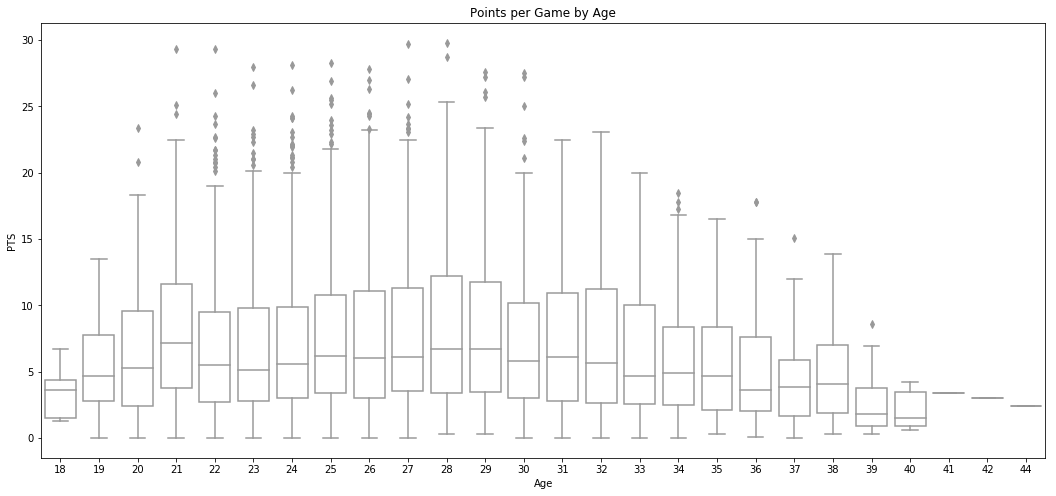

In [6]:
sns.boxplot(x="Age", y="PTS", data=player_data_df, color="w")
plt.title("Points per Game by Age")
plt.show()

Let's compute a column for points per 36 minutes and see if we gleam any extra insight.

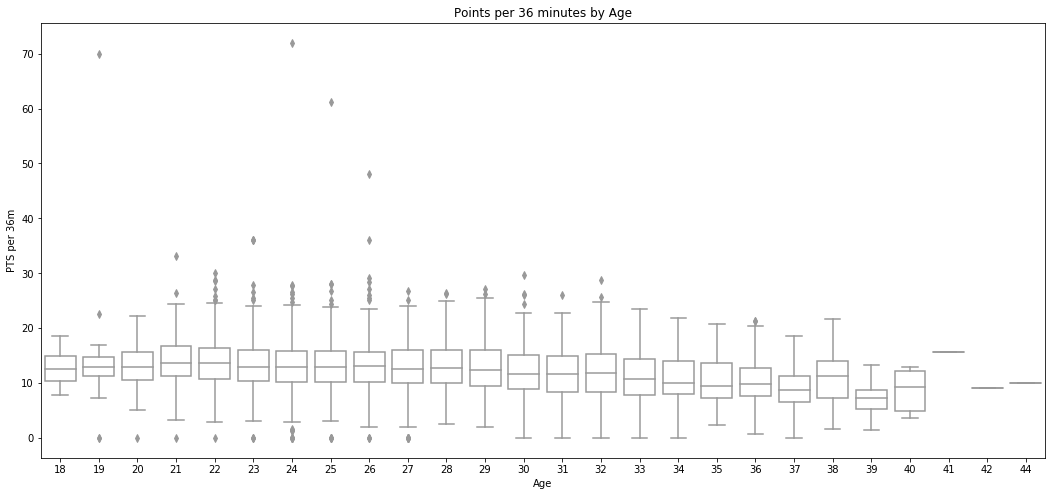

In [7]:
player_data_df["PTS per 36m"]=player_data_df["PTS"].divide(player_data_df["MP"])*36
sns.boxplot(x="Age", y="PTS per 36m", data=player_data_df, color="w")
plt.title("Points per 36 minutes by Age")
plt.show()

Woah! Immediately the outliers jump out. We will investigate these now, however in the context of this Capstone, individual outliers like these don't add much information. I suspect these are a result of instances where a player played very few matches with few minutes, but scored alot during those minutes.

In [8]:
print(player_data_df.loc[player_data_df["PTS per 36m"]>30, ["PTS per 36m", "PTS", "MP", "G"]])

      PTS per 36m  PTS   MP  G
511     69.882353  3.3  1.7  3
1304    72.000000  3.0  1.5  2
1702    48.000000  4.0  3.0  1
1749    36.000000  2.0  2.0  1
2295    36.000000  1.3  1.3  3
2375    33.157895  3.5  3.8  6
2704    36.000000  0.7  0.7  3
2973    61.200000  1.7  1.0  3
3243    36.000000  1.8  1.8  5


My suspision was correct, and considering the way the 'per 36 minute' metrics are calculated (*36) the potential error for extrapolating is demonstrated here. Let's have a look at the boxplots without these values.

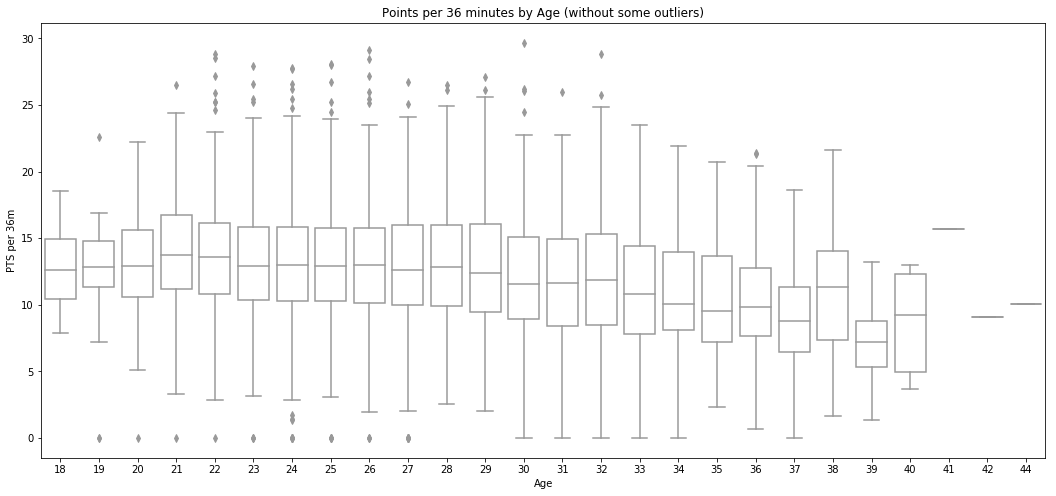

In [9]:
sns.boxplot(x="Age", y="PTS per 36m", data=player_data_df[player_data_df["PTS per 36m"]<30], color="w")
plt.title("Points per 36 minutes by Age (without some outliers)")
plt.show()

As we can see, the interquartile range remains somewhat constant, however the median drops gradually from the age of 28. Given the small sample size of NBA seasons where players were 38 or older, I'm not surprised to see that fluctuation in box plots. There are multiple factors determining the Points scored by a player (athleticism, experience etc etc) that it's hard to draw conclusions from this plot, but it's a nice sanity check to see that player efficiency (in terms of points per 36m) does decline with age. 

We could perform a similar analysis on other statistics (such as Assists or Rebounds for example) and 'Age' in an attempt to spot correlations, however this would be an exhausting process, so instead we will plot a heat map. During the data wrangling steps, we did not deal with roughly 400 rows of data (these corresponded to un-drafted NBA player seasons). The heatmap will also allow us to get an idea of how relevant (strength of correlation) 'Draft Placing' is in determining other statistics. 
We have to be careful to note that since we haven't outlined a specific hypothesis to test and we are calculating multiple correlatiion coefficients, we have to be mindful to correct for multiple correlation (using Bonferroni correction for example) in the case we decide to perform a hypothesis test. 


In [10]:
player_data_df_old=player_data_df
player_data_df=player_data_df.iloc[:,[0,3,5,6,7,10,11,12,13,16,17,18,19,21,22,23,25,26,28,29,30,31]]

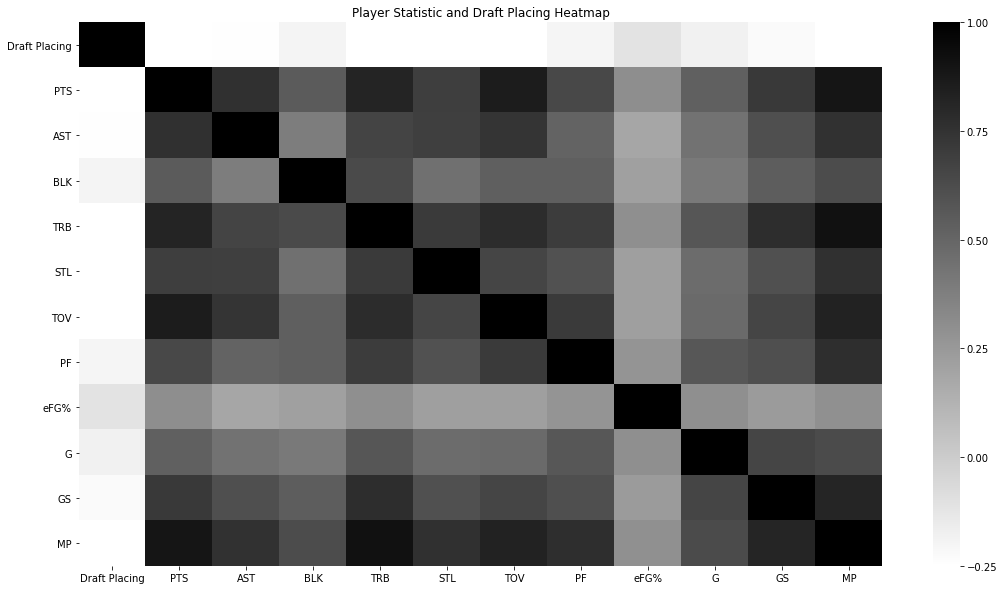

In [11]:
plt.rcParams["figure.figsize"] = [18,10]
#print(player_data_df.info())
sns.heatmap(data=player_data_df[["Draft Placing", "PTS", "AST", "BLK", "TRB","STL","TOV","PF","eFG%", "G", "GS", "MP"]].corr(),
            cmap="binary", vmin=-0.25, vmax=1)
plt.title("Player Statistic and Draft Placing Heatmap")
plt.yticks(rotation=0)
plt.show()

One of the first things that jumped out to me was that 'Draft Placing' was the only column to show weak negative correlation with every other column ( (-0.25,0) interval). Let's investigate why this is, surely 'Draft Placing' must have some relationship to statistics such as PTS.

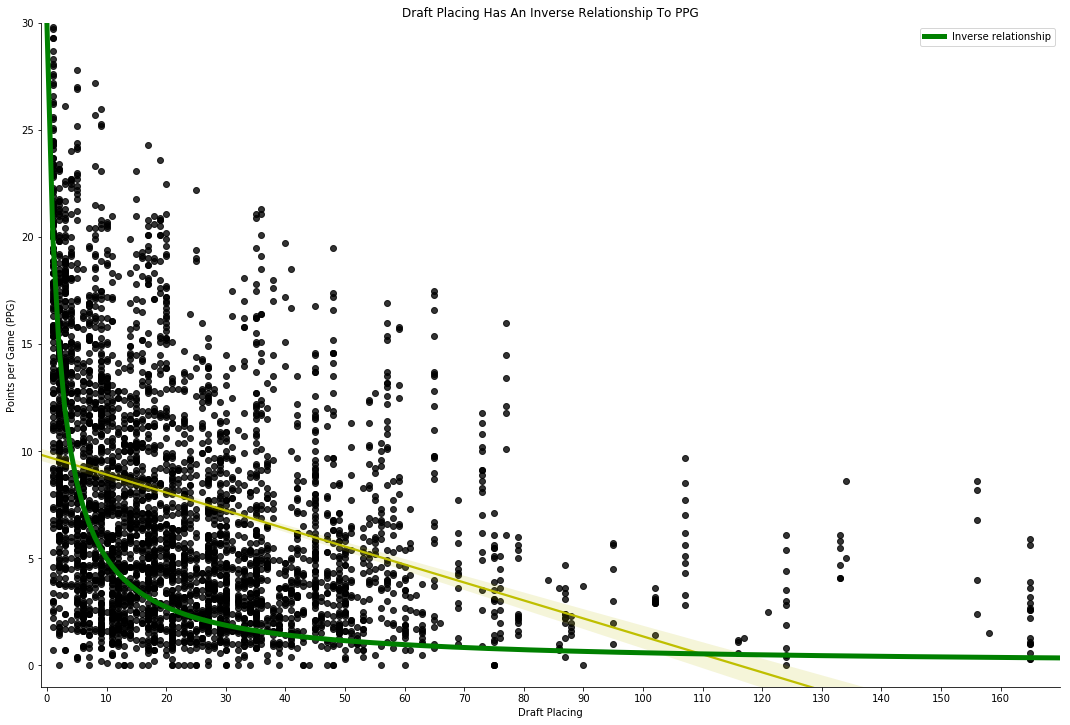

In [78]:
import numpy as np
sns.lmplot(x="Draft Placing", y="PTS", data=player_data_df, size=10, aspect=1.5,
           scatter_kws={"color":"black"}, line_kws={"color":"y"})
plt.plot([6/x for x in np.arange(0.2,20,0.1)], linewidth=5, color="green")
plt.title("Draft Placing Has An Inverse Relationship To PPG")
plt.ylabel("Points per Game (PPG)")
plt.xticks([x for x in range (0,170,10)])
plt.xlim(-1,170)
plt.ylim(-1,30)
plt.show()

In [73]:
#sns.lmplot(x="eFG%", y="PTS", data=player_data_df, fit_reg=False)
